In [1]:
import numpy as np
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from numpy import cos, sin, pi, exp 
from mpl_toolkits import mplot3d
from matplotlib import cm

## 1. Creating a generic function which returns minimum value for a given one and two variable function 


In [2]:
def Find_Minimum(Function,Function_derivative,Range):
    
    # One variable function
    if(len(Range)) == 1:

        #Creating a range of initial values
        arrbestx = np.linspace(Range[0][0],Range[0][1],5)
        def onestepderiv():
            nonlocal arrbestx
            ans = fans = 1e18
            fbestx = flr = None
            for bestx in arrbestx:
                for lr in np.arange(0,1,0.001):
                    for i in range(100):
                        # using gradient desent
                        x = bestx - Function_derivative(bestx) * lr 
                        bestx = x
                        if (x < Range[0][0] or x> Range[0][1]): break
                        y = Function(x)
                        if (y<fans):
                            fbestx = x
                            flr = lr
                    ans = min(ans,y)
                fans = min(ans,fans)
            return fbestx,fans,flr
        #returning the minimum value points and the learning rate used for it.
        return onestepderiv()
         

    #Two variable function
    else:

        #Creating a range of initial values
        arrbestx = np.linspace(Range[0][0],Range[0][1],3)
        arrbesty = np.linspace(Range[1][0],Range[1][1],3)
        def onestepderiv():
            ans = fans = ffans = 1e18
            fbestx = fbesty = flr = None
            nonlocal arrbestx, arrbesty
            for bestx in arrbestx:
                for besty in arrbesty:
                    for lr in np.arange(0,1,0.001):
                        for i in range(100):
                            # using gradient desent
                            x = bestx - Function_derivative(bestx,besty)[0]*lr
                            y = besty -Function_derivative(bestx,besty)[1]*lr 
                            if (x < Range[0][0] or x> Range[0][1] or y < Range[1][0] or y> Range[1][1]): break
                            z = Function(x,y)
                            bestx, besty = x, y
                            if (z<ffans):
                                fbestx = x
                                fbesty = y
                                flr = lr
                        ans = min(ans,z)
                    fans = min(fans,ans)
                ffans = min(ffans,fans)
            return fbestx,fbesty,ffans,flr
        #returning the minimum value points and the learning rate used for it.
        return onestepderiv()



It is very evidant that the minimum value found after several iterations using gradient desent hugely depends
- Learning rate
- Initial point

So, we can't keep them fixed to find the minimum value. Hence I have considered a range of values of initial points and learning rate and finally nested them in a for loop to find the minimum possible value

## 2. Making a function which animates the path taken to attain the minimum value of a one variable function

In [3]:
def Animation2D(Function,Function_derivative,lr,bestx,Range):
        #Create the axis and plot the curve
        xaxis = np.linspace(Range[0][0],Range[0][1],100)
        yaxis = Function(xaxis)
        fig, ax = plt.subplots()
        ax.plot(xaxis, yaxis)
        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')

        #Gradient desent
        xall, yall = [], []
        lnall,  = ax.plot([], [], 'ro')
        lngood, = ax.plot([], [], 'go', markersize=10)
        lr = lr
        bestx = bestx
        def onestepderiv(frame):
            nonlocal bestx, lr
            x = bestx - lr*Function_derivative(bestx)
            bestx = x
            y = Function(bestx)
            xall.append(x)
            yall.append(y)
            lnall.set_data(xall, yall)
            lngood.set_data(bestx, Function(bestx))
            
        #Animating the path to find minimum using FuncAnimation
        ani= FuncAnimation(fig, onestepderiv, frames=range(1000), interval=500, repeat=False)
        plt.show()
        return ani
    

The above function shows the path taken to reach minimum using red and green points. Red point traces the path taken from the initial point while green point stays on the place where it is mimimum till the current time.

# 3. Creating a function which animates the path taken to attain the minimum value of a two variable function

In [4]:
def Animation3D(Function,Function_derivative,lr,bestx,besty,Range):

    fig = plt.figure()
    ax = plt.axes(projection='3d')
   
    xaxis = np.linspace(Range[0][0],Range[0][1],1000)
    yaxis = np.linspace(Range[1][0],Range[1][1],1000)

    #Create a 2D grid and plot the surface curve
    X,Y = np.meshgrid(xaxis,yaxis)
    Z = Function(X,Y)
    ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,alpha = 0.6)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    #Gradient desent
    xall, yall,zall = [], [], []
    lnall,  = ax.plot([], [],[], 'ro')
    lngood, = ax.plot([], [],[], 'go', markersize=10)
    lr = lr
    bestx = bestx
    besty = besty
    def onestepderiv(frame):
        nonlocal bestx,besty,lr
        x = bestx - Function_derivative(bestx,besty)[0] * lr 
        bestx = x
        y = besty -Function_derivative(bestx,besty)[1]*lr
        besty = y  
        z = Function(x,y)
        lngood.set_data([x],[y])
        lngood.set_3d_properties([z])
            
        xall.append(x)
        yall.append(y)
        zall.append(z)
        
        lnall.set_data(xall, yall)
        lnall.set_3d_properties(zall)

    #Animation to show the path to find minimum 
    ani= FuncAnimation(fig, onestepderiv, frames=range(1000), interval=100, repeat=False)
    plt.show()
    return ani


Animation3D function does the same thing as Animation2D function but the syntax for implementing 3D plot is different. We need to use set_3d_properties to push z values to the surface plot which is not required for 2D plot.

## Problem 1 - 1-D simple polynomial

Minimum value of the Given function is 5.75 which occurs at x = -1.5 with a learning rate as 0.999
The below animation shows one of the path taken to achieve minimum


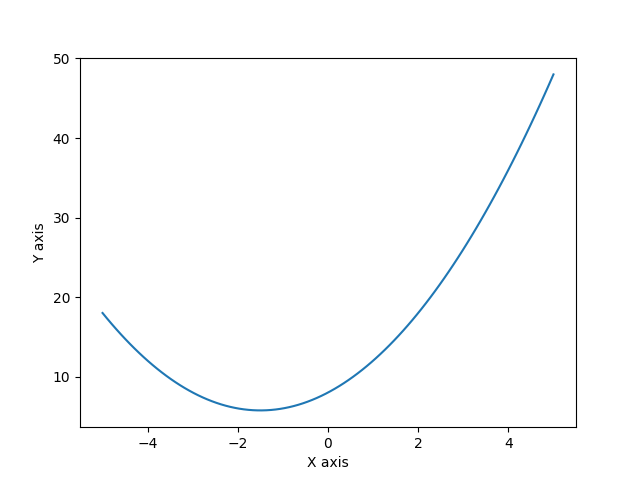

C:\Users\dell\AppData\Local\Temp\ipykernel_1768\4160518285.py:24: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(bestx, Function(bestx))
C:\Users\dell\AppData\Local\Temp\ipykernel_1768\4160518285.py:24: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(bestx, Function(bestx))
C:\Users\dell\AppData\Local\Temp\ipykernel_1768\4160518285.py:24: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(bestx, Function(bestx))
C:\Users\dell\AppData\Local\Temp\ipykernel_1768\4160518285.py:24: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(bestx, Function(bestx))
C:\Users\dell\AppData\Lo

In [5]:
def f1(x):
    return x ** 2 + 3 * x + 8

def f1d(x):
    return 2*x + 3

Range = [[-5,5]]
Result = Find_Minimum(f1,f1d,Range)
print("Minimum value of the Given function is",Result[1],"which occurs at x =",Result[0],"with a learning rate as",Result[2])
print("The below animation shows one of the path taken to achieve minimum")
Animation2D(f1,f1d,0.1,3,Range)

## Problem 2 - 2-D polynomial


Minimum value of the Given function is 2.0000000000004547 which occurs at (x,y) = (4.00091334293502 ,2.0) with a learning rate as 0.999
The below animation shows one of the path taken to achieve minimum


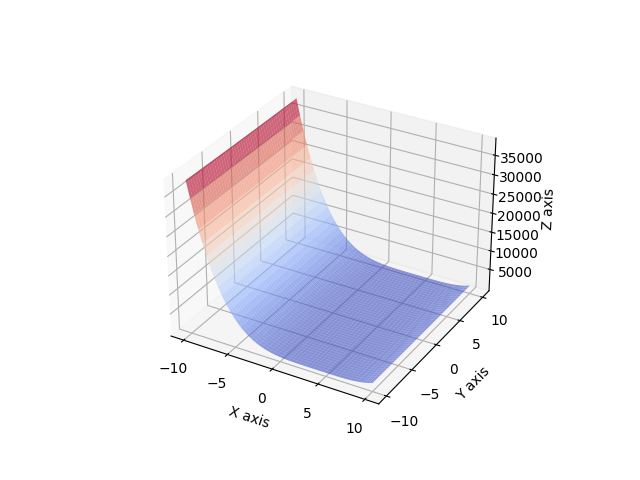

C:\Users\dell\AppData\Local\Temp\ipykernel_1768\4160518285.py:24: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(bestx, Function(bestx))
C:\Users\dell\AppData\Local\Temp\ipykernel_1768\4160518285.py:24: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(bestx, Function(bestx))
C:\Users\dell\AppData\Local\Temp\ipykernel_1768\4160518285.py:24: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(bestx, Function(bestx))
C:\Users\dell\AppData\Local\Temp\ipykernel_1768\4160518285.py:24: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(bestx, Function(bestx))
C:\Users\dell\AppData\Lo

In [6]:
def f2(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df2(x,y):
    arr = [4*x**3 - 48*x**2 + 192*x - 256,2*y - 4]
    return arr

Range = [[-10,10],[-10,10]]
Result = Find_Minimum(f2,df2,Range)
print(f"Minimum value of the Given function is {Result[2]} which occurs at (x,y) = ({Result[0]} ,{Result[1]}) with a learning rate as {Result[3]}")
print("The below animation shows one of the path taken to achieve minimum")
Animation3D(f2,df2,0.0003,-5,0,Range)


## Problem 3 - 2-D function 


Minimum value of the Given function is -1.0 which occurs at (x,y) = (-1.3297451036334422 ,3.141592653589793) with a learning rate as 0.0
The below animation shows one of the path taken to achieve minimum


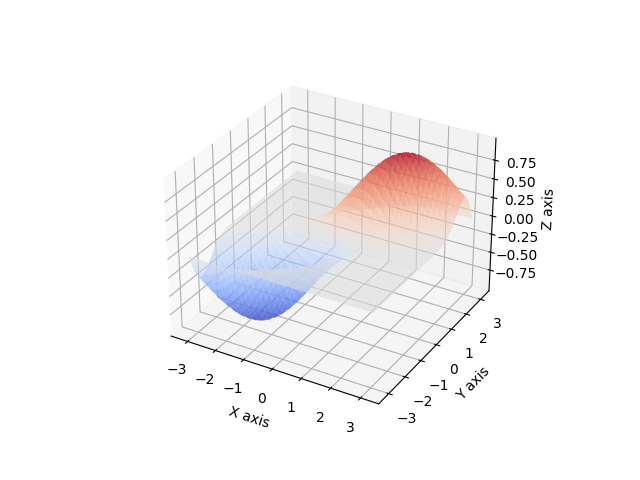

C:\Users\dell\AppData\Local\Temp\ipykernel_1768\4160518285.py:24: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(bestx, Function(bestx))
C:\Users\dell\AppData\Local\Temp\ipykernel_1768\4160518285.py:24: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(bestx, Function(bestx))
C:\Users\dell\AppData\Local\Temp\ipykernel_1768\4160518285.py:24: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(bestx, Function(bestx))


In [7]:
def f3(x,y):
    return exp(-(x - y)**2)*sin(y)

def df3(x,y):
    arr = [-2*exp(-(x - y)**2)*sin(y)*(x - y),exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)]
    return arr
Range = [[-pi,pi],[-pi,pi]]
Result = Find_Minimum(f3,df3,Range)
print(f"Minimum value of the Given function is {Result[2]} which occurs at (x,y) = ({Result[0]} ,{Result[1]}) with a learning rate as {Result[3]}")
print("The below animation shows one of the path taken to achieve minimum")
Animation3D(f3,df3,0.1,-0.5,-0.5,Range)

## Problem 4 - 1-D trigonometric

Minimum value of the Given function is -4.045412051572553 which occurs at x = 0.9853130467243183 with a learning rate as 0.9580000000000001
The below animation shows one of the path taken to achieve minimum


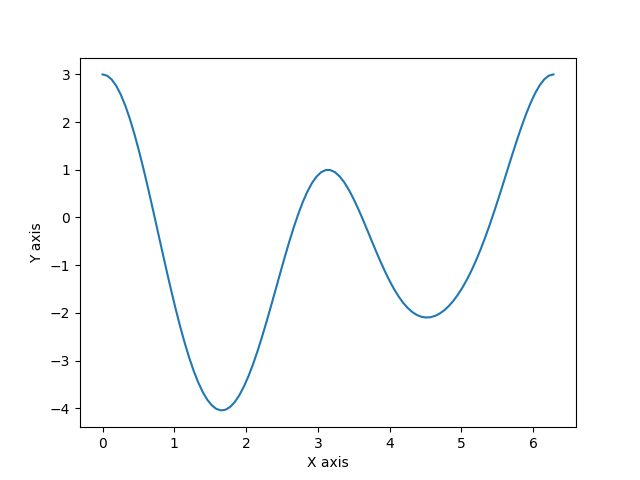

In [8]:
def f4(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1
def df4(x):
    return -4*sin(x)*cos(x)**3 - 3*cos(x)*sin(x)**2 -8*cos(x)*sin(x) - sin(x)

Range = [[0,2*pi]]
Result = Find_Minimum(f4,df4,Range)
print("Minimum value of the Given function is",Result[1],"which occurs at x =",Result[0],"with a learning rate as",Result[2])
print("The below animation shows one of the path taken to achieve minimum")
Animation2D(f4,df4,0.02,3,Range)

# 4. Creating a function to find the minimum value for a general n variable function

In [9]:
def Multivariable_Minimum(f,fd,point,lr):
    n = len(point)
    best = point
    #Defining very high value to initial minimum value
    ans = 1e18
    for i in range(1000000):
        for j in range(n):
            #update equation
            x = best[j]-fd(*best)[j]*lr
            best[j] =x
        y = f(*best)
        ans = min(ans,y)
    return ans


- The Multivariable_Minimum function just returns the minimum value of the given n variable function. The same gradient desent logic is used to implement it. Instead of writing the update equation for the n variables in consecutive lines, I have made a for loop where the update happens for all n variables. 
- Using the concept of unpacking list I was able to give all n parameters to the function and its derivative at once. Finally I returned the minimum value that the Multivariable_Minimum function found so far (After 100000 interations).

## Sample input to Multivariable_Minimum

In [10]:
def f(x,y,z):
    return x**4 + y**4 + z**4 - 2*x**2 - 2*y**2 - 2*z**2

def fd(x,y,z):
    return 4*x**3 - 4*x,4*y**3 - 4*y,4*z**3 - 4*z


print("The Minimum value of the given function is :" ,Multivariable_Minimum(f,fd,[1,2,1.5],0.1))

The Minimum value of the given function is : -3.0


I have considered a 3 variable function $x^4 + y^4 + z^4 - 2x^2 - 2y^2 - 2z^2$, with their derivatives as,

- $\frac{\partial f}{\partial x} = 4x^3 - 4x$

- $\frac{\partial f}{\partial y} = 4y^3 - 4y$

- $\frac{\partial f}{\partial z} = 4z^3 - 4z$



By giving this function, its derivative, initial point of [1,2,1.5] and learning factor of 0.1 to the Multivariable_Minimum function defined above, the minimum value turned out to be -3. 
